In [4]:
from mnist import MNIST
import numpy as np
from sklearn.utils import shuffle
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

mndata = MNIST('./mnist_data')
images, labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()



images = np.array(images)
labels = np.array(labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

images, labels = shuffle(images, labels, random_state=0)
test_images, test_labels = shuffle(test_images, test_labels, random_state=0)

images = images[:30000]
labels = labels[:30000]
test_images = test_images[:1000]
test_labels = test_labels[:1000]

ImportError: No module named 'mnist'

In [ ]:
# Problem 1  Euclidian distance

neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(images, labels) 
predictions = neigh.predict(test_images)


# problem 1 confusion matrix
correct = sum([a == b for a,b in zip(test_labels, predictions)])
print "1 Nearest neighbor success rate (Euclidian distance) =",correct/1000.0 * 100,"%"
confusion_mat = confusion_matrix(test_labels, predictions)
print "\ncounfustion matrix = \n",confusion_mat


fig, ax = plot_confusion_matrix(figsize=(5,5), conf_mat=confusion_mat)
plt.show()

In [ ]:
# Problem 1 Manhattan Distance
neigh = KNeighborsClassifier(n_neighbors=1,metric='manhattan')
neigh.fit(images, labels) 
predictions = neigh.predict(test_images)


# problem 1 Manhattan confusion matrix
correct = sum([a == b for a,b in zip(test_labels, predictions)])
print "1 Nearest neighbor success rate (Manhattan distance) =",correct/1000.0 * 100,"%"
conf_mat = confusion_matrix(test_labels, predictions)
print "\ncounfustion matrix = \n",conf_mat

fig, ax = plot_confusion_matrix(figsize=(5,5), conf_mat=conf_mat)
plt.show()

In [ ]:
# Problem 2 SVM using SGD
from sklearn import linear_model
clf = linear_model.SGDClassifier(loss='modified_huber',epsilon=0.01,n_iter=10)
clf.fit(images, labels)

predictions = clf.predict(test_images)

# Problem 2 Confusion matrix
from sklearn.metrics import confusion_matrix

correct = sum([a == b for a,b in zip(test_labels, predictions)])

print "SVM using SGDClassifier success rate =",correct/1000.0 * 100,"%"
conf_mat = confusion_matrix(test_labels, predictions)
print "\ncounfustion matrix = \n",conf_mat

fig, ax = plot_confusion_matrix(figsize=(5,5), conf_mat=conf_mat)
plt.show()

In [ ]:
# Problem 2 using LinearSVC

from sklearn import svm
X = images
y = labels
clf = svm.LinearSVC()
clf.fit(X, y)  

predictions = clf.predict(test_images)

# Problem 2 Confusion matrix
from sklearn.metrics import confusion_matrix

correct = sum([a == b for a,b in zip(test_labels, predictions)])

print "SVM using SGDClassifier success rate =",correct/1000.0 * 100,"%"
conf_mat = confusion_matrix(test_labels, predictions)
print "\ncounfustion matrix = \n",conf_mat

fig, ax = plot_confusion_matrix(figsize=(5,5), conf_mat=conf_mat)
plt.show()

In [ ]:
# Problem 2 using SVC

from sklearn import svm
X = images
y = labels
#clf = svm.SVC(decision_function_shape='ovr',kernel='linear')
clf = svm.SVC(C=100,decision_function_shape='ovr',kernel='poly',degree=3)
clf.fit(X, y)  

predictions = clf.predict(test_images)

# Problem 2 Confusion matrix
from sklearn.metrics import confusion_matrix

correct = sum([a == b for a,b in zip(test_labels, predictions)])

print "SVM using SVC(decision_function_shape='ovr',kernel='poly',degree=3) success rate =",correct/1000.0 * 100,"%"
conf_mat = confusion_matrix(test_labels, predictions)
print "\ncounfustion matrix = \n",conf_mat

fig, ax = plot_confusion_matrix(figsize=(5,5), conf_mat=conf_mat)
plt.show()

In [ ]:
# Problem 3 Spatial Pyramid Matching 

import scipy.io as sio
from scipy.sparse import csr_matrix
from sklearn.utils import shuffle
from sklearn import svm

classes = ['zero','one','two','three','four','five','six','seven','eight','nine']
train = []
training_labels = []

test = []
testing_labels = []


i = 0
for c in classes: 
    
    t = sio.loadmat('images/training_matrix/'+c+'.mat')['pyramid_all3']
    train.append(t)
    d = sio.loadmat('images/testing_matrix/'+c+'.mat')['pyramid_all3']
    test.append(d)
    training_labels.append([i]*len(t))
    testing_labels.append([i]*len(d))
    i = i+1

training_labels = np.array(training_labels)
training_labels = training_labels.flatten()
testing_labels = np.array(testing_labels)
testing_labels = np.hstack(testing_labels)



training_data = np.array(train[0])
testing_data = np.array(test[0])
for c in range(1,10): 

    training_data = np.concatenate((training_data,np.array(train[c])),axis=0)
    testing_data = np.concatenate((testing_data,np.array(test[c])),axis=0)
  
print training_data.shape
print training_labels.shape
print testing_data.shape
print testing_labels.shape

print training_labels
print testing_labels

#training_data = csr_matrix(training_data, dtype=np.float64)
#testing_data = csr_matrix(testing_data, dtype=np.float64)
training_data, training_labels = shuffle(training_data, training_labels, random_state=0)
testing_data, testing_labels = shuffle(testing_data, testing_labels, random_state=0)
training_data = 10000*training_data
testing_data = 10000*testing_data

# problem 2 
from sklearn import linear_model
clf = linear_model.SGDClassifier(n_iter=1000, loss='modified_huber')
#clf = svm.SVC(decision_function_shape='ovo',kernel='linear',C=10, gamma='auto',probability=True,verbose=True)
#clf = svm.LinearSVC(C=100000000,loss='hinge')
#clf = svm.SVC(decision_function_shape='ovr',kernel='poly',degree=5, C=100)
clf.fit(training_data[:1000], training_labels[:1000])

predictions = clf.predict(testing_data[:200])


'''

# problem 2
from sklearn.metrics import confusion_matrix

correct = sum([a == b for a,b in zip(testing_labels, predictions)])
print correct
print "success rate =",correct/10000.0 * 100.0,"%"
print "\ncounfustion matrix = \n",confusion_matrix(testing_labels, predictions)

'''
'''
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

from pykernels.basic import RBF

from pykernels.regular import Min,GeneralizedHistogramIntersection

X = training_data[:1000]
y=training_labels[:1000]

predictions = []
for clf, name in [(SVC(kernel=Min(), C=1000), 'Min')]:
    clf.fit(X, y)
    print name
    print clf
    print 'Predictions:', clf.predict(testing_data[:200])
    print 'labels: ',testing_labels[:200]
    predictions = clf.predict(testing_data[:200])
    print 'Accuracy:', accuracy_score(predictions, testing_labels[:200])
    print

'''
'''
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier,OutputCodeClassifier
from sklearn.svm import LinearSVC
predictions = OneVsRestClassifier(LinearSVC(random_state=0,C=10000,dual=False,class_weight='balanced')).fit(training_data[:20000], training_labels[:20000]).predict(testing_data[:500])
#predictions =OneVsOneClassifier(LinearSVC(random_state=0)).fit(training_data[:4000], training_labels[:4000]).predict(testing_data[:200])
#predictions = OutputCodeClassifier(LinearSVC(random_state=0),code_size=30, random_state=0).fit(training_data[:10000], training_labels[:10000]).predict(testing_data[:200])
'''
from sklearn.metrics import confusion_matrix


correct = sum([a == b for a,b in zip(testing_labels[:500], predictions)])
print correct
print "success rate =",correct/500.0 * 100.0,"%"
print "\ncounfustion matrix = \n",confusion_matrix(testing_labels[:500], predictions)


In [ ]:
# 4 Convolutional Neural Network 

# code from TensorFlow MNIST tutorial https://www.tensorflow.org/get_started/mnist/pros

# setup tensor flow 

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

import tensorflow as tf
sess = tf.InteractiveSession()

In [ ]:
# 4 Convolutional Neural Network 

# define placeholders and training steps 
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

sess.run(tf.global_variables_initializer())

y = tf.matmul(x,W) + b

# loss function = cross entropy 
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

for _ in range(1000):
  batch = mnist.train.next_batch(100)
  train_step.run(feed_dict={x: batch[0], y_: batch[1]})

In [ ]:
# 4 Convolutional Neural Network 

# evaluate model 

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

print(accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

In [ ]:
# 4 Convolutional Neural Network 

# define helper functions for neural network layers 

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [ ]:
# 4 Convolutional Neural Network 

x_image = tf.reshape(x, [-1,28,28,1])


# first convolutional layer 
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# second convolutional layer 
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# densely/fully connected layer 
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# dropout layer 
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# fully connected final layer 
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [ ]:
train_step1 = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
train_step2 = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
train_step = [(train_step1,'Adam'),(train_step2, 'Gradient Descent')]
print(train_step[0][0])

In [ ]:
for i in range(2,3):
    print(i)

In [ ]:
# 4 Convolutional Neural Network 


cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))
train_step1 = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
#train_step2 = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
train_step2 = tf.train.RMSPropOptimizer(0.01).minimize(cross_entropy)
train_step = [(train_step1,'Adam'),(train_step2, 'RMSprop')]
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())

train_loss = defaultdict(list)
test_loss = defaultdict(list)
for j in range(len(train_step)):
    for i in range(1000):
        batch = mnist.train.next_batch(50)
        if i%100 == 0:
            train_accuracy = accuracy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0})
            print("step %d, training accuracy %g"%(i, train_accuracy))
            train_loss[j].append(cross_entropy.eval(feed_dict={x:batch[0], y_: batch[1], keep_prob: 1.0}))
            test_loss[j].append(cross_entropy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
        train_step[j][0].run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})
    print("test accuracy %g"%accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))
    
    
    t = range(10)
    plt.figure(figsize=(7,7))
    plt.title('Train and test loss for '+train_step[j][1]+' optimization')
    plt.plot(t, train_loss[j], 'r', label='train loss')
    plt.plot(t, test_loss[j], 'b', label='test loss')
    plt.legend()
    plt.ylabel('loss')
    plt.xlabel('iterations')
    plt.show()
    '''
    plt.figure(figsize=(7,7))
    plt.title('Training loss over each epoch ('+train_step[j][1]+' Optimization)')
    plt.plot(train_loss[j])
    plt.ylabel('training loss')
    plt.xlabel('iterations')
    plt.show()

    plt.figure(figsize=(7,7))
    plt.title('Test loss over each epoch ('+train_step[j][1]+' Optimization)')
    plt.plot(test_loss[j])
    plt.ylabel('test loss')
    plt.xlabel('iterations')
    plt.show()
    '''

In [1]:
import numpy as np

np.random.seed(1337)  # for reproducibility
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics.classification import accuracy_score

#from dbn.tensorflow import SupervisedDBNClassification
from dbn import SupervisedDBNClassification

# Loading dataset
digits = load_digits()
X, Y = digits.data, digits.target

# Data scaling
X = (X / 16).astype(np.float32)

# Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Training
classifier = SupervisedDBNClassification(hidden_layers_structure=[256, 256],
                                         learning_rate_rbm=0.05,
                                         learning_rate=0.1,
                                         n_epochs_rbm=10,
                                         n_iter_backprop=100,
                                         batch_size=32,
                                         activation_function='relu',
                                         dropout_p=0.2)
classifier.fit(X_train, Y_train)

# Test
Y_pred = classifier.predict(X_test)
print('Done.\nAccuracy: %f' % accuracy_score(Y_test, Y_pred))



[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 2.740666
>> Epoch 2 finished 	RBM Reconstruction error 1.805594
>> Epoch 3 finished 	RBM Reconstruction error 1.432523
>> Epoch 4 finished 	RBM Reconstruction error 1.274614
>> Epoch 5 finished 	RBM Reconstruction error 1.127715
>> Epoch 6 finished 	RBM Reconstruction error 1.016233
>> Epoch 7 finished 	RBM Reconstruction error 0.931797
>> Epoch 8 finished 	RBM Reconstruction error 0.904623
>> Epoch 9 finished 	RBM Reconstruction error 0.891258
>> Epoch 10 finished 	RBM Reconstruction error 0.790757
>> Epoch 1 finished 	RBM Reconstruction error 2.880171
>> Epoch 2 finished 	RBM Reconstruction error 1.491411
>> Epoch 3 finished 	RBM Reconstruction error 1.120919
>> Epoch 4 finished 	RBM Reconstruction error 0.921536
>> Epoch 5 finished 	RBM Reconstruction error 0.763747
>> Epoch 6 finished 	RBM Reconstruction error 0.667087
>> Epoch 7 finished 	RBM Reconstruction error 0.573752
>> Epoch 8 finished 	RBM Reconstructi

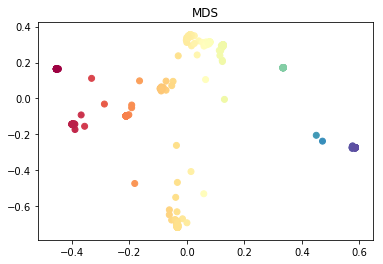

In [22]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets


import numpy as np
from sklearn.manifold import TSNE
X = classifier._compute_output_units_matrix(classifier.transform(X_test))
'''
model = TSNE(n_components=2,  random_state=0, init='pca')
np.set_printoptions(suppress=True)
Y = model.fit_transform(X) 

t = np.arange(len(Y))
plt.scatter(Y[:, 0], Y[:, 1], c=Y[:, 0], cmap=plt.cm.Spectral)
plt.title("t-SNE")
#ax.xaxis.set_major_formatter(NullFormatter())
#ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()
'''

mds = manifold.MDS(n_components=10, max_iter=100, n_init=1)
Y = mds.fit_transform(X)

plt.title("MDS")
plt.scatter(Y[:, 0], Y[:, 1],c=Y[:, 0],  cmap=plt.cm.Spectral)


plt.axis('tight')
plt.show()